In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.collections import LineCollection

In [135]:
fname = ['synflood','readbomb','injection','combination']
f=3
normal = pd.read_csv(fname[f]+'/'+fname[f]+'_normal.csv')
normal['Time'] = normal['Time'].apply(math.floor)
normal = normal[['No.','Time']].to_numpy()
attack = pd.read_csv(fname[f]+'/'+fname[f]+'_attack.csv')
attack['Time'] = attack['Time'].apply(math.floor)
attack = attack[['No.','Time']].to_numpy()
attack_time = np.unique(attack[:,1])
data = np.concatenate((attack,normal), axis=0)
time = len(np.unique(data[:,1]))
pkt = []

In [136]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [137]:
for i in range(time):
    pkt.append([i,np.count_nonzero(data[:,1] == i)])
    
pkt = np.asarray(pkt)

In [138]:
smooth_pkt = pkt.copy()
smooth_pkt[:,1] = smooth(smooth_pkt[:,1],20)
smooth_time = []
for t in attack_time:
    for i in range(t-9,t):
        smooth_time.append(i)
    for j in range(t,t+9):
        smooth_time.append(j)

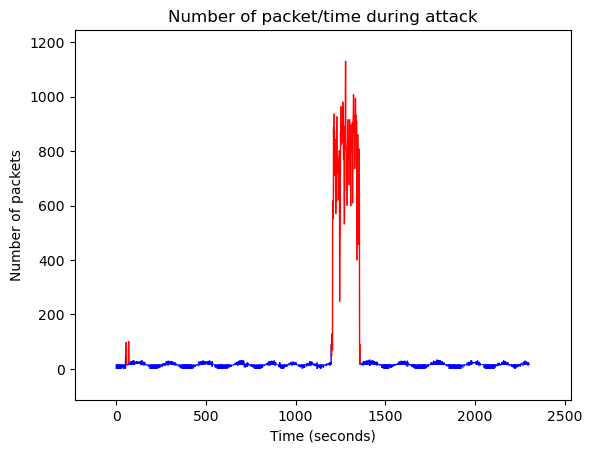

In [140]:
x = pkt[:,0]
y = pkt[:,1]
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

cm = dict(zip(range(0,2,1),list("br")))
colors = list( map( cm.get , np.isin(x,attack_time) ))

lc = LineCollection(segments, colors=colors, linewidths= 1)
fig, ax = plt.subplots()
ax.add_collection(lc)

ax.autoscale()
ax.margins(0.1)
plt.xlabel('Time (seconds)')
plt.ylabel('Number of packets')
plt.title('Number of packet/time during attack')
# plt.savefig('plot/'+fname[i]+'/'+fname[i]+'_pkt.pdf')
plt.show()

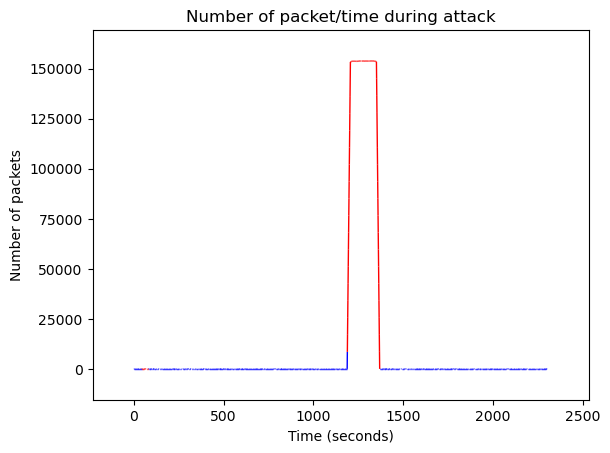

In [141]:
x = range(len(smooth_pkt))
y = smooth_pkt[:,1]
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

cm = dict(zip(range(0,2,1),list("br")))
colors = list( map( cm.get , np.isin(x,smooth_time) ))

lc = LineCollection(segments, colors=colors, linewidths= 1)
fig, ax = plt.subplots()
ax.add_collection(lc)

ax.autoscale()
ax.margins(0.1)
plt.xlabel('Time (seconds)')
plt.ylabel('Number of packets')
plt.title('Number of packet/time during attack')
# plt.ylim([0,200])
plt.savefig('plot/'+fname[f]+'/'+fname[f]+'_pkt.pdf')
plt.show()